In [1]:
#縮減神經網路的大小
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)

x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from tensorflow.keras import models
from tensorflow.keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))  #原始的為 16 個單元
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['acc'])

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
#容量較低的模型版本
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))  #改成容量較低的 4 個單元
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

original_hist = original_model.fit(x_train, y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 9s 86ms/step - loss: 0.4690 - acc: 0.8172 - val_loss: 0.3502 - val_acc: 0.8830
Epoch 2/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2746 - acc: 0.9073 - val_loss: 0.2896 - val_acc: 0.8898
Epoch 3/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2075 - acc: 0.9284 - val_loss: 0.2951 - val_acc: 0.8836
Epoch 4/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1722 - acc: 0.9388 - val_loss: 0.2946 - val_acc: 0.8835
Epoch 5/20
49/49 [==============================] - 2s 34ms/step - loss: 0.1486 - acc: 0.9493 - val_loss: 0.3214 - val_acc: 0.8763
Epoch 6/20
49/49 [==============================] - 1s 26ms/step - loss: 0.1299 - acc: 0.9554 - val_loss: 0.3284 - val_acc: 0.8768
Epoch 7/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1124 - acc: 0.9626 - val_loss: 0.3497 - val_acc: 0.8737
Epoch 8/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1009 - a

In [3]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 51ms/step - loss: 0.5147 - acc: 0.8015 - val_loss: 0.4137 - val_acc: 0.8631
Epoch 2/20
49/49 [==============================] - 1s 23ms/step - loss: 0.3287 - acc: 0.9016 - val_loss: 0.3328 - val_acc: 0.8808
Epoch 3/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2494 - acc: 0.9213 - val_loss: 0.2976 - val_acc: 0.8861
Epoch 4/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2071 - acc: 0.9326 - val_loss: 0.2895 - val_acc: 0.8846
Epoch 5/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1789 - acc: 0.9412 - val_loss: 0.2844 - val_acc: 0.8870
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1600 - acc: 0.9472 - val_loss: 0.2896 - val_acc: 0.8860
Epoch 7/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1447 - acc: 0.9539 - val_loss: 0.2990 - val_acc: 0.8833
Epoch 8/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1320 - a

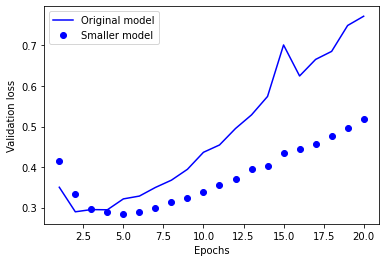

In [4]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b-', label='Original model')

plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [5]:
#更高容量的模型版本
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))  #改以更高容量的 512 個輸出單位
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
          loss='binary_crossentropy',
          metrics=['acc'])

bigger_model_hist = bigger_model.fit(x_train, y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 68ms/step - loss: 0.4565 - acc: 0.8027 - val_loss: 0.3755 - val_acc: 0.8362
Epoch 2/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2168 - acc: 0.9144 - val_loss: 0.2926 - val_acc: 0.8803
Epoch 3/20
49/49 [==============================] - 2s 34ms/step - loss: 0.1220 - acc: 0.9547 - val_loss: 0.6735 - val_acc: 0.7883
Epoch 4/20
49/49 [==============================] - 2s 32ms/step - loss: 0.0745 - acc: 0.9784 - val_loss: 0.4583 - val_acc: 0.8814
Epoch 5/20
49/49 [==============================] - 2s 33ms/step - loss: 0.0907 - acc: 0.9844 - val_loss: 0.4476 - val_acc: 0.8790
Epoch 6/20
49/49 [==============================] - 2s 33ms/step - loss: 0.0025 - acc: 0.9998 - val_loss: 0.6893 - val_acc: 0.8788
Epoch 7/20
49/49 [==============================] - 2s 33ms/step - loss: 0.1212 - acc: 0.9874 - val_loss: 0.5742 - val_acc: 0.8765
Epoch 8/20
49/49 [==============================] - 2s 32ms/step - loss: 4.9943e-04

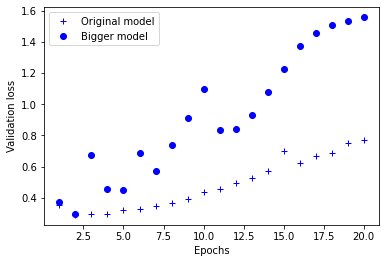

In [6]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

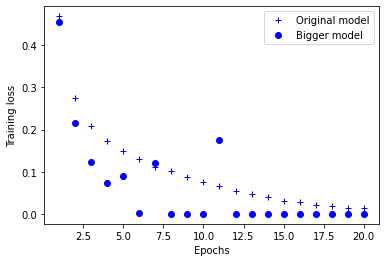

In [7]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [8]:
#加入權重常規化
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),  #加入 L2 權重常規化並將學習率設為 0.001 
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['acc'])

l2_model_hist = l2_model.fit(x_train, y_train,
              epochs=20,
              batch_size=512,
              validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 81ms/step - loss: 0.5070 - acc: 0.8222 - val_loss: 0.3916 - val_acc: 0.8802
Epoch 2/20
49/49 [==============================] - 1s 25ms/step - loss: 0.3231 - acc: 0.9024 - val_loss: 0.3388 - val_acc: 0.8881
Epoch 3/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2754 - acc: 0.9193 - val_loss: 0.3327 - val_acc: 0.8871
Epoch 4/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2562 - acc: 0.9254 - val_loss: 0.3572 - val_acc: 0.8768
Epoch 5/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2427 - acc: 0.9327 - val_loss: 0.3758 - val_acc: 0.8706
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2366 - acc: 0.9343 - val_loss: 0.3643 - val_acc: 0.8760
Epoch 7/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2288 - acc: 0.9366 - val_loss: 0.3586 - val_acc: 0.8802
Epoch 8/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2260 - a

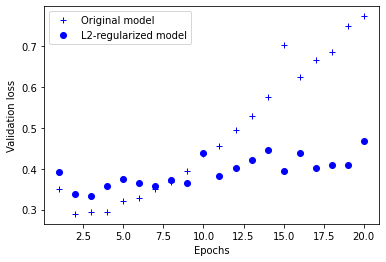

In [9]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [10]:
from tensorflow.keras import regularizers

regularizers.l1(0.001)  #L1 常規化

regularizers.l1_l2(l1=0.001, l2=0.001)  #同時使用 L1 及 L2 常規化

In [ ]:
#丟棄法(Dropout)
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['acc'])

dpt_model_hist = dpt_model.fit(x_train, y_train,
                epochs=20,
                batch_size=512,
                validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - ETA: 0s - loss: 0.5861 - acc: 0.6892

In [ ]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()